#  Data Load, Cleaning, Preprocessing and feature eng.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import sys
import os
import re
import warnings
warnings.filterwarnings('ignore')

In [5]:
%%time 
df = pd.read_csv('DataSet/IMDB-Dataset-65k-movie-review.csv')

CPU times: total: 1.47 s
Wall time: 2.48 s


In [6]:
#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might", "hate"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'theirs', 'or', "that'll", 'shouldn', 'all', 'both', 'am', 'was', 'into', 'yours', 'but', "shouldn't", 'hadn', "aren't", "won't", 'other', 'having', 'yourself', 'those', "you'll", 'while', 'him', 'o', 'just', 'doing', 'against', 'should', "should've", 'an', 'now', 'again', 'out', 'if', 'shall', 'her', "shan't", 'does', 'ain', 'how', 'aren', 'has', 'himself', 'themselves', 'about', 'below', 't', 've', 'didn', 'the', 'above', 'wasn', 'had', 'own', 'yourselves', 'itself', 'there', 'needn', 'by', 'he', 'from', 'them', 'for', 'i', 'who', "needn't", "mightn't", 'y', 'could', 'to', 'because', 'you', "you've", "don't", 'their', 'they', 'which', 'some', 'we', 'on', "she's", 'd', "wasn't", 'over', 'up', 'these', 'me', "doesn't", 'same', 'weren', 'did', "you're", 'won', 'my', 'of', 'with', 'have', 'being', 'ours', 'where', 'when', 'might', 'through', 'that', 'under', 'once', 's', 'in', 'before', 'down', 'mightn', 'your', 'shan', 'than', 'each', 'off', 'hate', 'then', 'further', "hadn't", 'wouldn

In [7]:
'''-----------------------------Data Cleaning and Preprocessing pipeline----------------------------------'''

#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    # content = re.sub(r"n\'t", " not", content)
    # content = re.sub(r"\'re", " are", content)
    # content = re.sub(r"\'s", " is", content)
    # content = re.sub(r"\'d", " would", content)
    # content = re.sub(r"\'ll", " will", content)
    # content = re.sub(r"\'t", " not", content)
    # content = re.sub(r"\'ve", " have", content)
    # content = re.sub(r"\'m", " am", content)
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

df['Reviews_clean'] = df['Reviews'].apply(data_cleaning)
df.head(89809)

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,* Isenção de responsabilidade: eu só assisti e...,disclaimer watched movie conditional agreement...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,Estou escrevendo isso na esperança de que isso...,writing hopes gets put previous review film an...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,"Realmente, eu poderia escrever uma crítica con...",really write scathing review turd sandwich ins...
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,Se você viu os outros filmes falsificados ante...,saw previous spoof movies two horrible gentlem...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,Este filme eu vi um dia cedo de graça e ainda ...,movie saw day early free still feel like got r...
...,...,...,...,...,...
89804,6.0,The Hound of the Baskervilles is never realise...,The Hound of the Baskervilles,O Cão dos Baskervilles nunca realiza seu poten...,hound baskervilles never realises comedy poten...
89805,6.0,I get why people are frustrated with this movi...,Ánimas,Entendo por que as pessoas estão frustradas co...,get people frustrated movie well made atmosphe...
89806,6.0,Sweet dreams are made of these ... or is it sw...,Ánimas,Bons sonhos são feitos disso ... ou são filmes...,sweet dreams made sweet movies psychological m...
89807,6.0,Shirhin Farhad Ki Toh Nikal Padi (U/A)--------...,Shirin Farhad Ki Toh Nikal Padi,Shirhin Farhad Ki Toh Nikal Padi (U / A) -----...,shirhin farhad ki toh nikal padi u rating clea...


In [9]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing 
df=df[df.Label<'2']
data=df[['Reviews_clean','Label']]
print(data['Label'].value_counts())

print("0 --> ❌")
print("1 --> ✔️")

0    60000
1    60000
Name: Label, dtype: int64
0 --> ❌
1 --> ✔️


 # Lamitization class

In [10]:
#Importing dependencies for feature engineering 
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [12]:
# lemmatization of word 
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [16]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
tfidfvect_10000 = TfidfVectorizer(
    analyzer = "word",
    tokenizer = LemmaTokenizer(),
    ngram_range=(1,3),
    min_df=10,
    max_features=10000
)
x_train_tfidf = tfidfvect_10000.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect_10000.transform(test['Reviews_clean']).toarray()

y_train = train['Label']
y_test = test['Label']

# model evaluation 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

In [23]:
# Step 3: Logistic Regression Training
logreg = LogisticRegression()
logreg.fit(x_train_tfidf, y_train)

LogisticRegression()

In [24]:
# import joblib

# filename = 'Model\logistic_regression_model.pkl'
# joblib.dump(model_1, filename)

In [28]:
%%time
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,logreg.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,logreg.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,logreg.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,logreg.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,logreg.predict(x_test_tfidf)))

Precision Score for Logistic Regression: 0.8943611111111112
Recall Score for Logistic Regression: 0.8943611111111112
AUC Score for Logistic Regression: 0.9597632899389581
F1 Score for Logistic Regression: 0.8943631090966269
Accuracy Score for Logistic Regression: 0.8943611111111112
CPU times: total: 3.69 s
Wall time: 2.51 s


# confusion matrix

In [29]:
y_predict=model_1.predict(x_test_tfidf)
y_predict_prob=model_1.predict_proba(x_test_tfidf)[:,1]

confusion_matrix(y_test, y_predict)

array([[16195,  1965],
       [ 1838, 16002]], dtype=int64)

In [33]:
def confusion_matrix_plot():
    confmatrix = confusion_matrix(y_test,y_predict)
    fig, ax = plt.subplots(figsize=(3,3 ))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

In [34]:
test['Reviews_clean'][101787]

'kate needs stop denying perfectionist controller needs watch show see acts became vain since become conscious paparazzi live spotlight expect money really root evil see happens ask much remember balance not seen treat jon go something remove sit worried look like tv camera forgot fun kids suppose fun get dirty give old clothes play clothes not worry getting dirty'

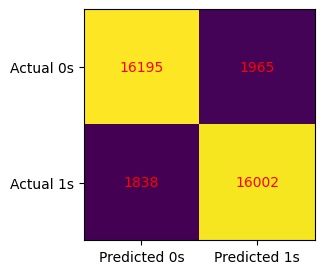

In [37]:
confusion_matrix_plot()

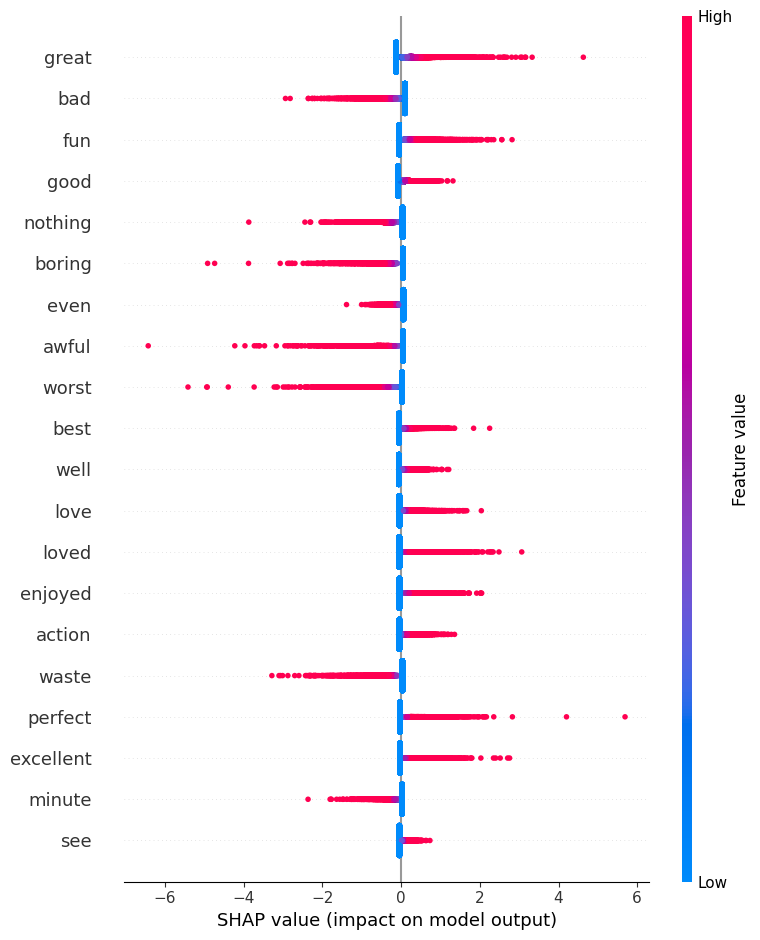

In [40]:
import shap

explainer_3 = shap.LinearExplainer(logreg, x_train_tfidf)

# Calculate SHAP values for the test data
shap_values = explainer_3.shap_values(x_test_tfidf)

# Summary plot (beeswarm plot) of SHAP values
shap.summary_plot(shap_values, features=x_test_tfidf, feature_names=tfidfvect_10000.get_feature_names_out())
plt.show()

In [42]:
explainer_3 = shap.LinearExplainer(
    model_1,
    x_train_tfidf,
    feature_names= tfidfvect_10000.get_feature_names_out()
)

# Calculate SHAP values for the test data
shap_values = explainer_3(x_test_tfidf)

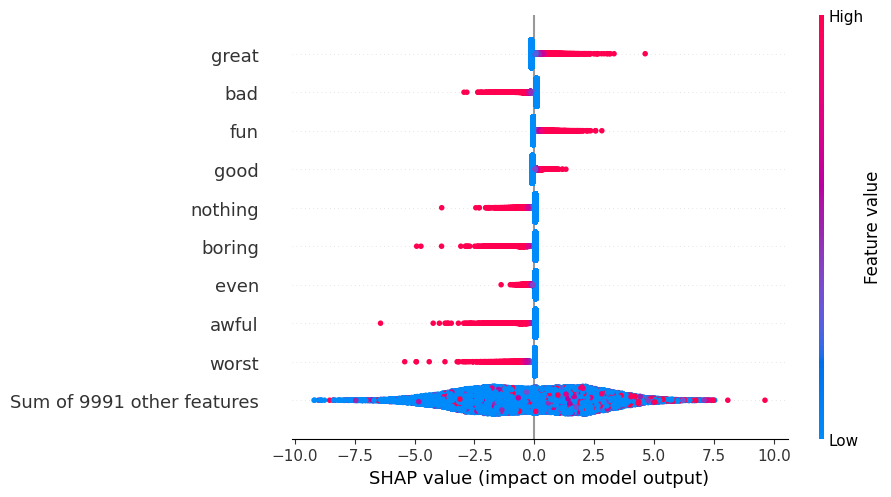

In [43]:
shap.plots.beeswarm(shap_values)